# Fitting Classification Trees

This warm-up refreshes R syntax for in preparation for discussing
the `tree` R package.
It follows the lab in **Section 8.1.3** of
[Introduction to Statistical Learning with R](http://www-bcf.usc.edu/~gareth/ISL/)
by James, Witten, Hastie, and Tibshirani.  Despite being a recently
release, it's already so popular that it's simply referred to as ISLR.
The link above references the authors' website that offers freely available
download in PDF format as well as options for hardcopy purchases.

This warm-up doesn't presume to improve upon the lab as described in ISLR.
Rather, like the other warm-up topics, its intent is to quickly
familiarize newcomers to R through a brief interactive immersion at
[Meet-ups for the Orange County R Users Group](https://www.meetup.com/OC-RUG/).
Thus the lab is a back-drop for discussing fundamental R concepts.
The ISLR lab was chosen to encourage newcomers
to further explore ISLR as a guide for statistical learning.

## R Packages

There are two packages required to run this lab that are not part of a
freshly installed R distribution.

* `tree` - A package for creating decision tree models
* `ISLR` - A package of datasets provided by the authors of ISLR.

R packages are organized into a linked list of *environments*.

Assuming you have an internet connection, these can be installed with the
following commands.

```
install.packages('tree')
install.packages('ISLR')
```

This places the package code in a directory used by your R installation.
It does **not** load the code into your running R environment.  For that
you must run the `library` command.  To better understand the library
command, let's first view our current environment with the `search` command.

In [1]:
search()

[1] ".GlobalEnv"        "jupyter:irkernel"  "jupyter:irkernel" 
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "Autoloads"         "package:base"

Add the `tree` and `ISLR` packages with the `library` command.
Then check your environment list again.

In [2]:
library(tree)
library(ISLR)
search()

[1] ".GlobalEnv"        "package:ISLR"      "package:tree"     
 [4] "jupyter:irkernel"  "jupyter:irkernel"  "package:stats"    
 [7] "package:graphics"  "package:grDevices" "package:utils"    
[10] "package:datasets"  "package:methods"   "Autoloads"        
[13] "package:base"

Notice how the libraries were added into the environment **after**
the `.GlobalEnv` package, but **before** the other environments.  Normally
we don't have to worry about the order that we add libraries.  But it
could make a difference when an added library has a dependency on another
library; especially a dependency which is not installed by default.

## Peak at Carseats

In **Lab 8.3.1** of the ISLR book, the `Carseats` dataset is used to explore
some concepts decision tree analysis.  The `Carseats` dataset is included with
the **ISLR** package.

Usually when working with a dataset, we want to know how many rows and columns
are involved.

In [3]:
dim(Carseats)

[1] 400  11

This tells us there are `400` rows and `11` columns.  The number of
columns is easily printed, but if we carelessly
type `Carseats`, 400 lins will scroll by.  To limit this, we can use
the `head` command to see the first six rows of data.  You can provide
a second numeric arguments to override the number of rows.

In [4]:
head(Carseats, 10)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes
6.63,115,105,0,45,108,Medium,71,15,Yes,No
11.85,136,81,15,425,120,Good,67,10,Yes,Yes
6.54,132,110,0,108,124,Medium,76,10,No,No
4.69,132,113,0,131,124,Medium,76,17,No,Yes


## Determine Predictor

This dataset represents training data for which `Sales` represents the
outcome.  Ideally we model the value of `Sales` directly.  But all models
have their range limits affected by outliers.  In this example, we'll
restrict our concern to "*whether the sales are high*".
We create a new variable, `High` that represents a
*high number of sales*.  It will take on two possible values:

* `Yes` - if the `Sales` value is greater than 8,
* `No` - otherwise.

In [5]:
High <- ifelse(Carseats$Sales <= 8, "No", "Yes")
High[1:20]

[1] "Yes" "Yes" "Yes" "No"  "No"  "Yes" "No"  "Yes" "No"  "No"  "Yes" "Yes"
[13] "No"  "Yes" "Yes" "Yes" "No"  "Yes" "Yes" "Yes"

In [6]:
Carseats <- data.frame(Carseats, High)
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes


The `High` value was determined by the `Sales` variable, none of the others.
The other values were predictors determined **before** the outcome.  Now we
wish to create a classification tree to model the `High` value based **only
on predictor variables** (not `Sales`, which is only known after an outcome).
This is the purpose for which the `tree` packages was included.

The first parameter to the `tree` function is an *R formula*.  These are
common among R modeling functions.  Each function interprets the formula
a little differently.  But after you've seen enough of them, you begin to
develop an intuition.  For our present tree model, we'll use the following
formula.  The second line describes the element of the formula above it.

```
      High           ~              .            -Sales
(predict High)  (based on)  (everything else) (except Sales)
```

The second parameter to `tree` is the dataset on which to operate.

In [7]:
tree.carseats <- tree(High ~ .-Sales, Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

The `summary` method is used in R to print a summary of the object.
Not all R objects support the summary method.  But most objects that
represent models do.

A rudementary graphical representation can be produced with the
`plot` and `text` functions.

In [8]:
options(repr.plot.width=6, repr.plot.height=6) # For jupyter notebooks.

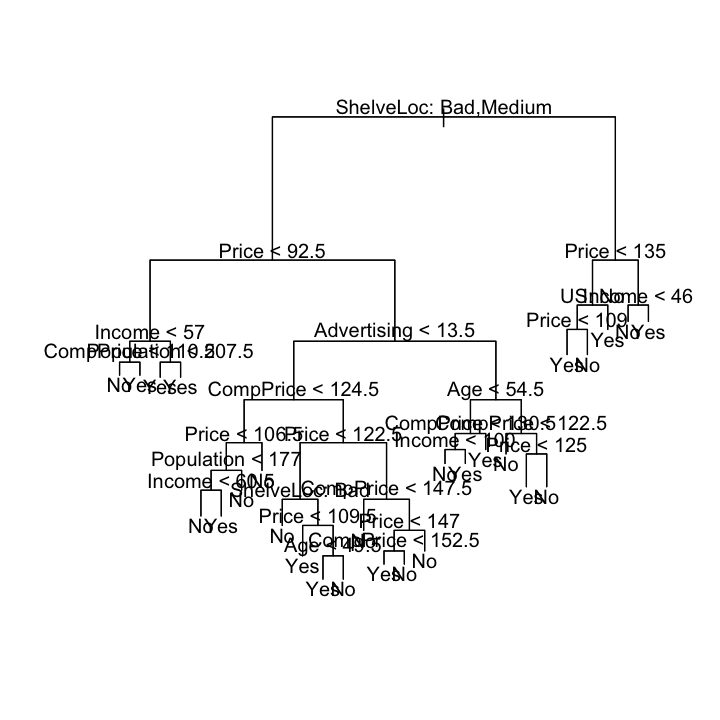

In [9]:
plot(tree.carseats)
text(tree.carseats, pretty=0)

The `text` method is an *S3 generic*.  That's a fancy way of saying that
different packages can define different versions of the `text` method
which are dynamically determined based on the argument.  The `text` method
is a popular for plotting messages text on a plot.  But in this case, a different
version of the `text` function was chosen by passing in a *tree model*.
The actual name of this tree version is `text.tree` and is defined in
the **tree** package.  We can see all implementations of the `text` generic
with the `methods` object.

In [14]:
methods('text')

[1] text.default  text.formula* text.tree*   
see '?methods' for accessing help and source code

The `text.default` is associated with the **plot** package.
The `text.tree` function is what we invoked when we supplied
a **tree** object into `text`.

## Classification Error Rate

This section provides some base plotting practice and applies
it to gaining some intuition for classification error rate.
Recall that the decision tree divides the predictor space
into regions.  Hopefully, within any particular region, most
of the training values belong to one class with a small number
belonging
to the other classes.  These "*other classes*" are the errors.
In the ideal case, **all values** belong to one class.  Then
there are no errors in the region.  But in practice, we hope
for a high proportion of values in one class and low proportions
for the other classes.

If we attempt to quantify this ideal, we want to

* __reward__ proportions of certainty (either close to probability
  zero or close to probability one),
* __penalize__ proportions of uncertainty (away from probability
  zero or probability one).

Since proportions are always between zero and one, such a function
should have a minimal contribution to error rate at zero and one;
and a maximum contribution to error rate in the middle.  A simple
candidate for such a function is an inverted *parabola* with zeros 
at zero and one:

$$
-(x - 0)(x - 1) = -x(x-1)
$$

Let's plot quickly to verify.  No need to get fancy.

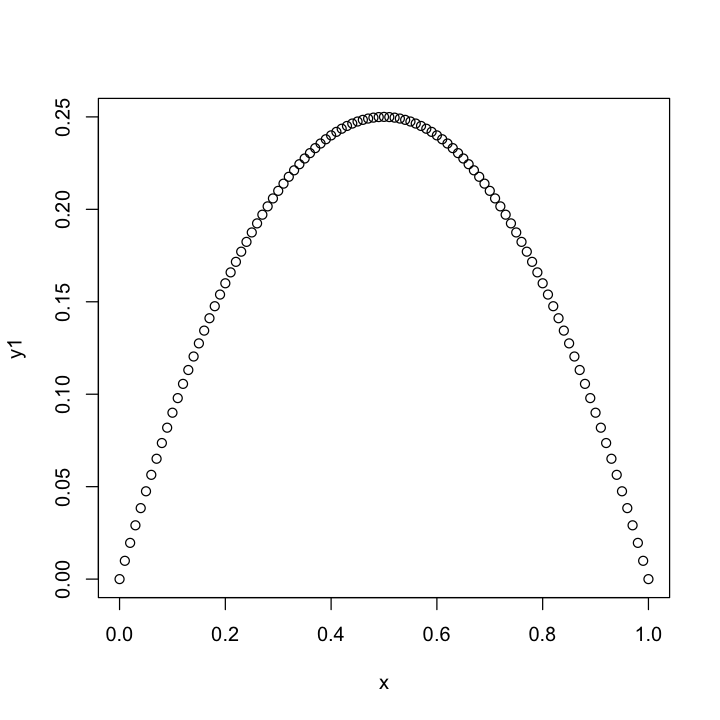

In [10]:
x <- seq(0, 1, 0.01)
y1 <- -x*(x-1)
plot(x, y1)

It's easy to see that this function has small values near the "*certain proportions*"
near zero and near one.  The values closer to the middle (the "*uncertain proportions*")
have larger values.  They contribute more to the error.  This is the motivation for
the formula for the Gini index

$$
G_m = \sum_{k=1}^K \hat{p}_{mk}(1 - \hat{p}_{mk})
$$

In the equation above (Equation 8.6 of ISLR), $k$ runs through the classes
in region $m$.  I added the $m$ subscript because this expression applies
to region $m$.

Then an *alternative to the Gini index* is introduced, the so-called
*cross-entropy*.

$$
D_m = -\sum_{k=1}^K \hat{p}_{mk} \log(\hat{p}_{mk})
$$

What's so great about this measure other than its cool sounding name?
First a quick plot.

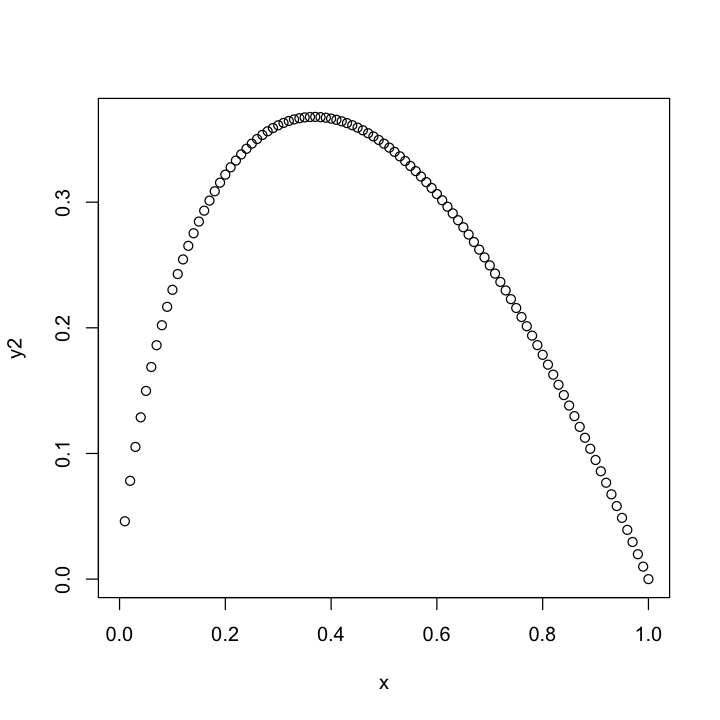

In [11]:
y2 = -x*log(x)
plot(x, y2)

It's similar to the Gini index in shape, but a little skew to the left.
We can compare the two directly using a few extra commands.
The **points** command is similar to **plot**.  The `plot` command
starts a new plotting area.  The `points` command continues to plot
on an existing plotting area.

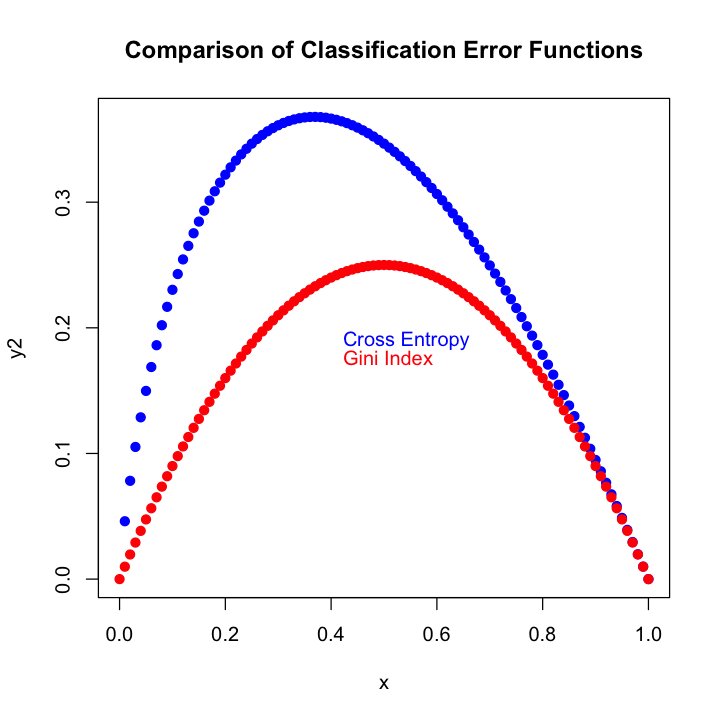

In [12]:
plot(x, y2, col="blue", pch=19)
points(x, y1, col="red", pch=19)
title(main="Comparison of Classification Error Functions")
legend('center', c("Cross Entropy", "Gini Index"),
       text.col=c("blue", "red"), bty="n")

The cross-entry was plotted first because it is the tallest.
Switch the order of the plots on your own to see how the
cross-entropy will get off because the plotting area was determined
by the Gini index.

The "lopsided" shape of the cross-entropy is a bit misleading.
We only plotted it as a function of one probability.  The
$D_m$ expression is a sum over all possibile outcomes.
Once this is done, the curve becomes symmetric.  Let's verify this
for the case of two outcomes.

$$
y_3 = -\sum_{i=1}^2 p_i \log_2(p_i)
$$

where $p_1 + p_2 = 1$.  There are two variables, but the relationship
$p_1 + p_2 = 1$ reduces it to a single dimension.  We'll set
$x = p_1 = 1 - p_2$.

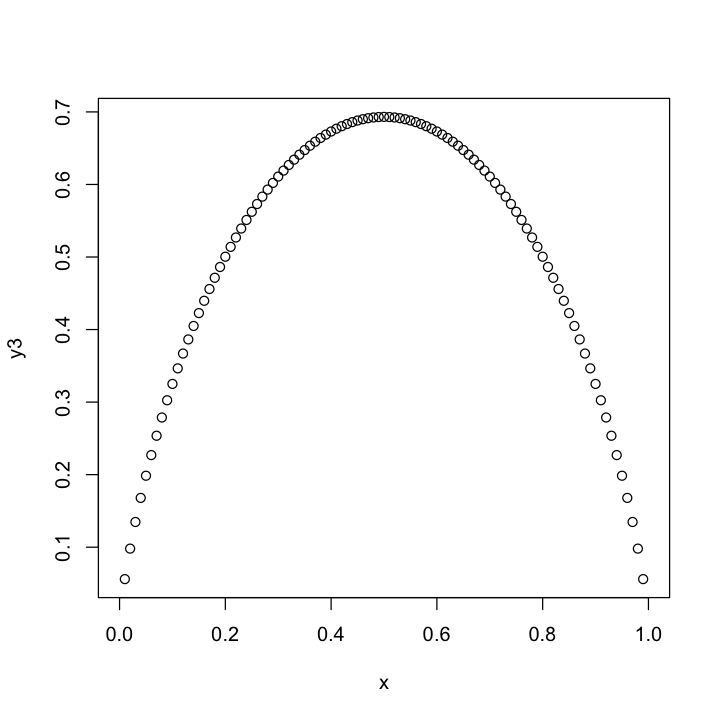

In [18]:
y3 <- -x * log(x) - (1-x)* log(1-x)
plot(x, y3)

Now that we have a little more intuition for the Gini index
and cross-entropy, let's apply it back to our tree model created
for the ISLR lab.  First let's dump the model nodes.

In [19]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

We're mostly interested in terminal nodes; these are indicated by
an asterisk on the end.  Let's examine two nodes up close.

```
16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
```

The first line has the following breakdown:
* `16)` - this is the label or id for the node in the model
* `CompPrice < 110.5` - the criterion for this node split
* `5` - the number of training elements that landed in this node
* `0.000` - the deviance (a perfect score!)
* `No` - the prediction for this node
* `(1.0, 0.0)` - the proportion of values (`NO` proportion, `YES` proportion).

Node `16` is ideal in that it has zero deviance.
Page 325 of ISLR defines the *deviance* for classification trees as

$$
-2 \sum_m \sum_k n_{mk} \log(\hat{p}_{mk})
$$

In the present model, $k$ ranges over `No` and `YES`,
$m$ ranges over the terminal nodes.  For a particular terminal node,
we have

$$
-2 [ n_{no} \log p_{no} + n_{yes} \log p_{yes} ]
$$

We're not given $n_{no}$ and $n_{yes}$ directly.  Rather, we're given
$n$, the total number of observations in the terminal node and the
proportions $(p_{no}, p_{yes})$.  Then we have $n_{no} = n \times p_{no}$
and $n_{yes} = n \times  p_{yes}$.

For the line 16 above, the deviance is

$$
-2 [5 \log(1) + 0 \log(0)] = -2 [0+0] = 0
$$

Let's apply this formula to node `17`.
```
17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
```

Here $n=5, p_{no}=.40, p_{yes}=.60$.  The deviance is

$$
-2 [5(.4) \log(.4) + 5(.6) \log(.6)] = -2 [2 \log(.4) + 3 \log(.6)]
$$

In [21]:
dev_17 <- -2 * (2*log(.4) + 3*log(.6))
round(dev_17, 3)

[1] 6.73

It's good that our manual calculation agrees with the `6.730`
from the tree output.
It's good practice to verify the deviance of a few more nodes
to get the hang of it.